In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## import Picture

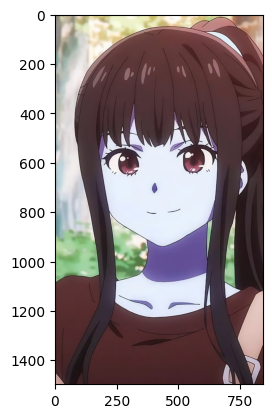

In [2]:
image = cv.imread("../test_img/b4a026a7-d5e5-47e4-86f1-9a6cec282cee.png",)
plt.imshow(image)

In [3]:
image.shape

(1498, 842, 3)

### Convert Image to monokrom Image

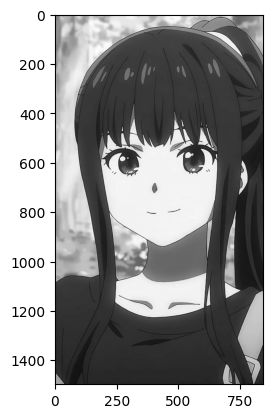

In [4]:
# convert image to monokrom
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")

In [5]:
faceAnimeCascade = cv.CascadeClassifier("../opencv/lbpcascade_animeface.xml")
eyeAnimeCascade = cv.CascadeClassifier("../opencv/anime-eyes-cascade.xml")
# box detect face
face_detected = faceAnimeCascade.detectMultiScale(gray_image,1.15,3)
face_detected

array([[ 57, 285, 758, 758]], dtype=int32)

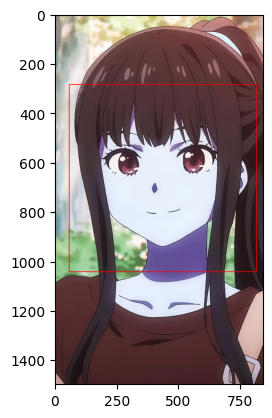

In [6]:
(x,y,w,h) = face_detected[0]
x,y,w,h
face_img = cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

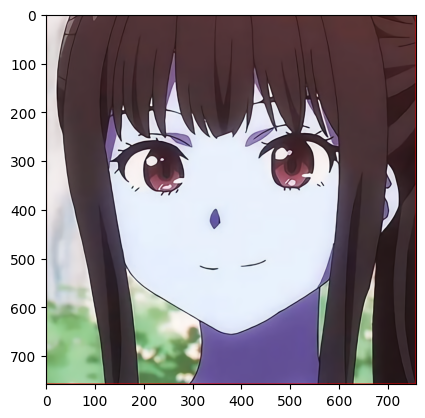

In [7]:
# cropping image with face
face_character = face_img[y:y+h,x:x+w]
plt.imshow(face_character)

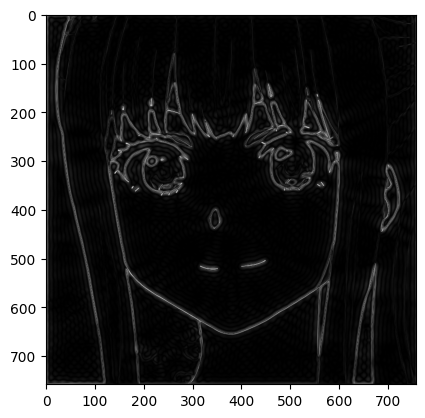

In [8]:
# extration image characters
from Selector.featuresExtraction import gaussianHP,dwt2d,FFT2D
gausian_extration = gaussianHP(face_character,0.12)
plt.imshow(gausian_extration,cmap="gray")

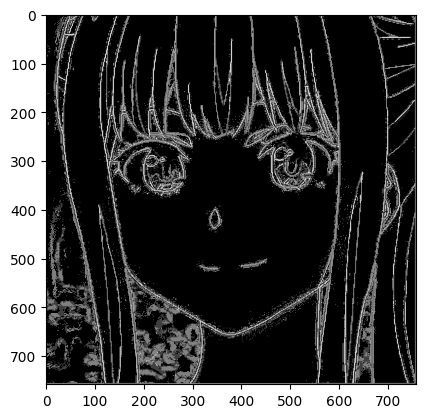

In [9]:
dwt_encoder=dwt2d(face_character)
plt.imshow(dwt_encoder,cmap="gray")

### Testing with shibuya rin

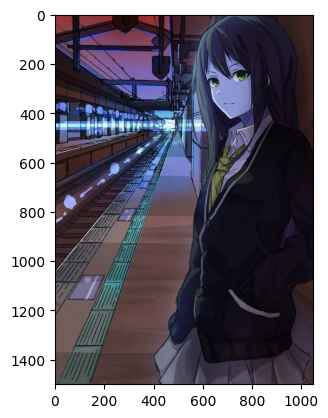

In [10]:
shibuya_image = cv.imread("../test_img/shibuya_img.jpg")
plt.imshow(shibuya_image)

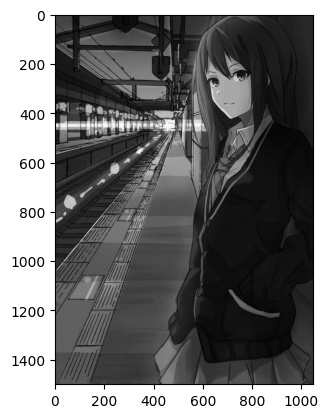

In [11]:
gray_image = cv.cvtColor(shibuya_image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")

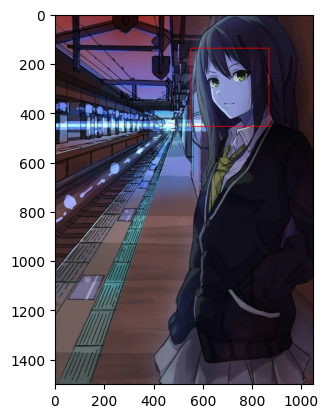

In [12]:
shibuya_face_detected = faceAnimeCascade.detectMultiScale(gray_image,1.10,3)
(x,y,w,h) = shibuya_face_detected[0]
x,y,w,h
face_img = cv.rectangle(shibuya_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

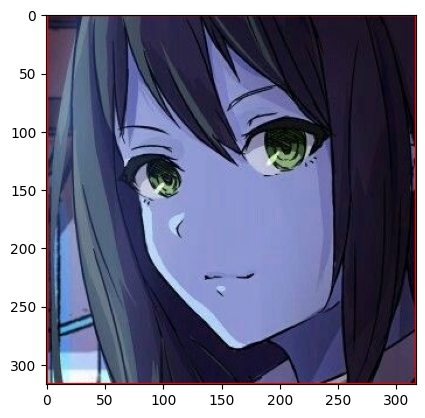

In [13]:
shibuya_face = face_img[y:y+h,x:x+w]
plt.imshow(shibuya_face)

#### Gaussian High Point

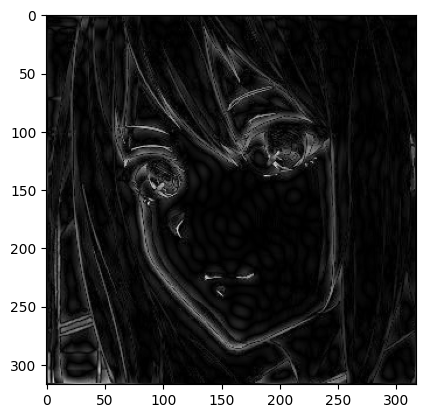

In [14]:
gausian_extration = gaussianHP(shibuya_face,0.11)
plt.imshow(gausian_extration,cmap="gray")

#### Discrete Wavelet Transform

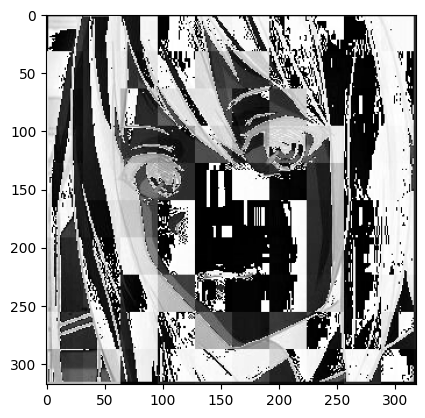

In [15]:
dwt2d_extration = dwt2d(shibuya_face,"haar",5)
plt.imshow(dwt2d_extration,cmap="gray")

### Fast Fourier

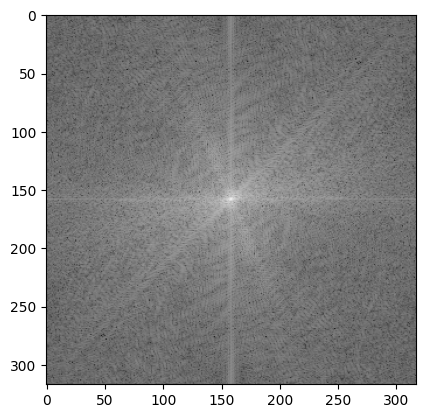

In [16]:
fft_encoder = FFT2D(shibuya_face)
plt.imshow(fft_encoder,cmap="gray")

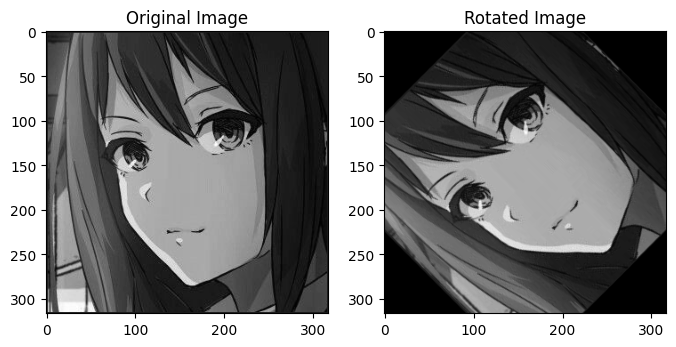

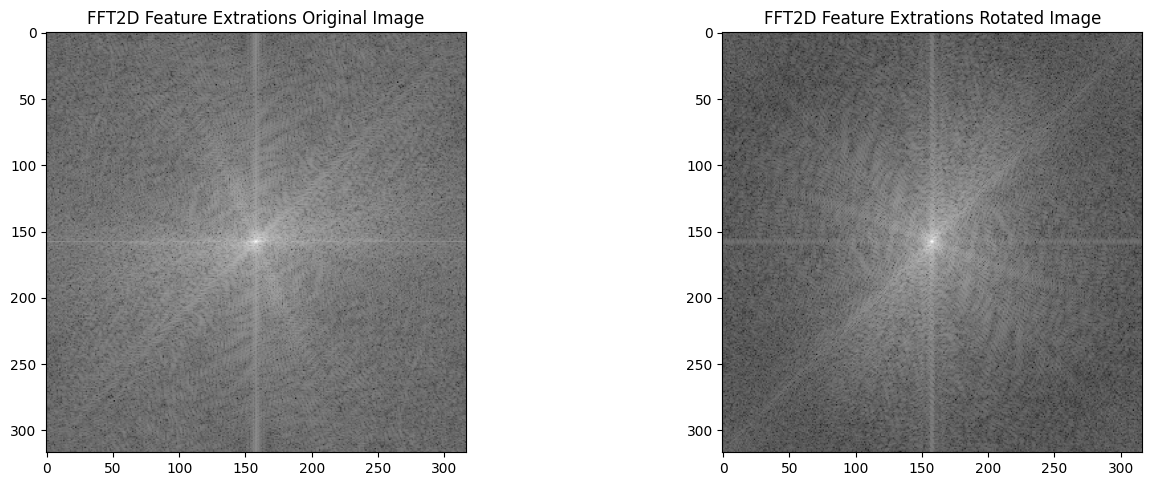

In [23]:
image = cv.cvtColor(shibuya_face,cv.COLOR_BGR2GRAY)
rotation_angle = 45
rows, cols = image.shape
rotation_matrix = cv.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
rotated_image = cv.warpAffine(image, rotation_matrix, (cols, rows))
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotated Image')
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 3), plt.imshow(FFT2D(image), cmap='gray'), plt.title('FFT2D Feature Extrations Original Image')
plt.subplot(2, 2, 4), plt.imshow(FFT2D(rotated_image), cmap='gray'), plt.title('FFT2D Feature Extrations Rotated Image')
plt.show()